In [53]:
from support.df_init import init

train = init()
test = init('pp_test.csv')

In [25]:
diff_count = (train['isAdult'] != train['is_Adult']).sum()
percent_diff = 100 * diff_count / len(train)
percent_diff, diff_count

(0.0, 0)

In [26]:
diff_count = (test['isAdult'] != test['is_Adult']).sum()
percent_diff = 100 * diff_count / len(test)
percent_diff, diff_count

(0.0, 0)

In [27]:
train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'countryOfOrigin', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryO

In [28]:
train['is_Adult'] = train['isAdult'] | train['is_Adult']
test['is_Adult'] = test['isAdult'] | test['is_Adult']

In [29]:
train['is_Adult'].value_counts(), test['is_Adult'].value_counts()

(is_Adult
 0    15747
 1      425
 Name: count, dtype: int64,
 is_Adult
 0    5250
 1     134
 Name: count, dtype: int64)

In [30]:
train = train.drop(columns=['isAdult'])
test = test.drop(columns=['isAdult'])

In [ ]:
# train.to_csv('pp_train.csv', index=False)
# test.to_csv('pp_test.csv', index=False)

In [68]:
train = init('dm1_dataset_2425_imdb/train.csv')
test = init('dm1_dataset_2425_imdb/test.csv')

In [19]:
import pandas as pd

# One-hot encode the 'genres' column for both train and test DataFrames
train_genres = train['genres'].str.get_dummies(sep=',')
test_genres = test['genres'].str.get_dummies(sep=',')

# Align columns to ensure both train and test have the same genre columns
train_genres, test_genres = train_genres.align(test_genres, join='outer', axis=1, fill_value=0)

# Optionally, concatenate back to the original DataFrames
train = pd.concat([train, train_genres], axis=1)
test = pd.concat([test, test_genres], axis=1)

In [21]:
train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western',
       '\N'],
      dtype='object')

In [22]:
diff_count = (train['isAdult'] != train['Adult']).sum()
percent_diff = 100 * diff_count / len(train)
percent_diff, diff_count

(0.09737690950033473, 16)

In [23]:
diff_count = (test['isAdult'] != test['Adult']).sum()
percent_diff = 100 * diff_count / len(test)
percent_diff, diff_count

(0.018254837531945966, 1)

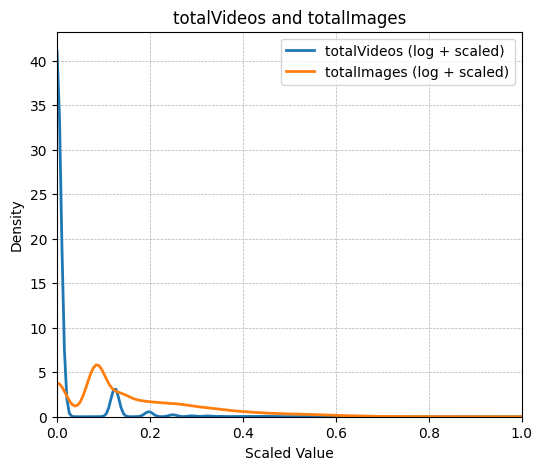

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert totalVideos and totalImages to log scale (add 1 to avoid log(0))
videos_log = np.log1p(train['totalVideos'])
images_log = np.log1p(train['totalImages'])

# Combine and reshape into a 2D array for scaling
log_combined = np.vstack((videos_log, images_log)).T

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(log_combined)
scaled_videos = scaled[:, 0]
scaled_images = scaled[:, 1]

# Plot KDE (smoothed line plot of distribution)
plt.figure(figsize=(6, 5))
sns.kdeplot(scaled_videos, label='totalVideos (log + scaled)', color='tab:blue', linewidth=2)
sns.kdeplot(scaled_images, label='totalImages (log + scaled)', color='tab:orange', linewidth=2)
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.title('totalVideos and totalImages')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlim(0, 1)
plt.show()

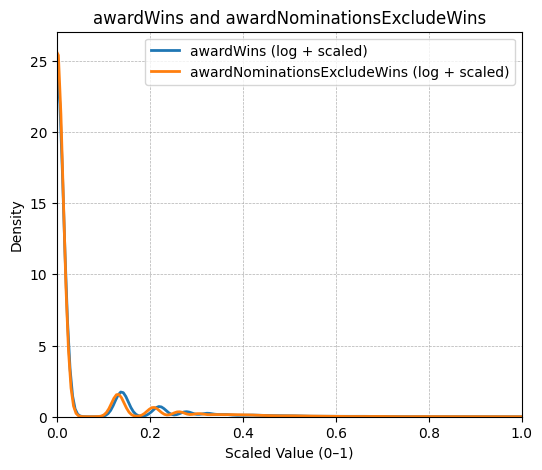

In [66]:
awards = np.log1p(train['awardWins'])
nominations = np.log1p(train['awardNominationsExcludeWins'])

# Combine and reshape into a 2D array for scaling
log_combined = np.vstack((awards, nominations)).T

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(log_combined)
scaled_videos = scaled[:, 0]
scaled_images = scaled[:, 1]

# Plot KDE (smoothed line plot of distribution)
plt.figure(figsize=(6, 5))
sns.kdeplot(scaled_videos, label='awardWins (log + scaled)', color='tab:blue', linewidth=2)
sns.kdeplot(scaled_images, label='awardNominationsExcludeWins (log + scaled)', color='tab:orange', linewidth=2)
plt.xlabel('Scaled Value (0–1)')
plt.ylabel('Density')
plt.title('awardWins and awardNominationsExcludeWins')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlim(0, 1)
plt.show()

In [69]:
(train['titleType'] == 'videoGame').sum()

259

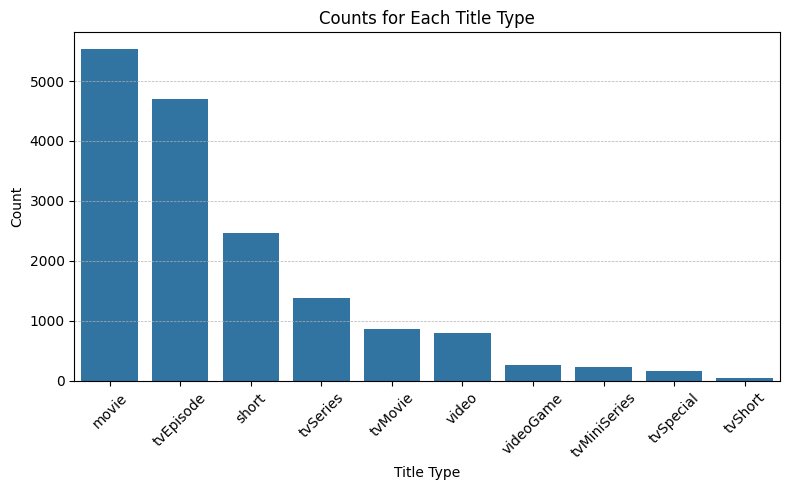

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=train, x='titleType', order=train['titleType'].value_counts().index,
    color='tab:blue')
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.title('Counts for Each Title Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle="--", linewidth=0.5)
plt.show()

In [76]:
print(train['titleType'].value_counts())

titleType
movie           5535
tvEpisode       4698
short           2474
tvSeries        1375
tvMovie          868
video            792
videoGame        259
tvMiniSeries     224
tvSpecial        166
tvShort           40
Name: count, dtype: int64


In [77]:
type_percentages = 100 * train['titleType'].value_counts(normalize=True)
print(type_percentages)

titleType
movie           33.686325
tvEpisode       28.592295
short           15.056905
tvSeries         8.368328
tvMovie          5.282697
video            4.820157
videoGame        1.576289
tvMiniSeries     1.363277
tvSpecial        1.010285
tvShort          0.243442
Name: proportion, dtype: float64


In [78]:
init().columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'fill_runtimeMinutes',
       'is_from_Oceania', 'is_from_North America', 'is_from_South America',
       'is_from_Asia', 'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS'